In [13]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Electric_Vehicle_Title_and_Registration_Activity.csv')

df = df[df["Electric Range"] != 0]
df = df[df["Sale Price"] != 0]
df = df[df["Base MSRP"] != 0]

In [14]:
# Data preprocessing and feature engineering (you need to adapt this based on your dataset)
# Example: Convert 'Electric Range' to a numeric column, handle missing values, etc.
df['Electric Range'] = pd.to_numeric(df['Electric Range'], errors='coerce')
df.dropna(inplace=True)



In [15]:
len(df)

1772

In [16]:
df.columns

Index(['Clean Alternative Fuel Vehicle Type', 'VIN (1-10)', 'DOL Vehicle ID',
       'Model Year', 'Make', 'Model', 'Vehicle Primary Use', 'Electric Range',
       'Odometer Reading', 'Odometer Code', 'New or Used Vehicle',
       'Sale Price', 'Sale Date', 'Base MSRP', 'Transaction Type',
       'DOL Transaction Date', 'Transaction Year', 'County', 'City',
       'State of Residence', 'Postal Code',
       '2015 HB 2778 Exemption Eligibility',
       '2019 HB 2042 Clean Alternative Fuel Vehicle (CAFV) Eligibility',
       'Meets 2019 HB 2042 Electric Range Requirement',
       'Meets 2019 HB 2042 Sale Date Requirement',
       'Meets 2019 HB 2042 Sale Price/Value Requirement',
       '2019 HB 2042: Battery Range Requirement',
       '2019 HB 2042: Purchase Date Requirement',
       '2019 HB 2042: Sale Price/Value Requirement',
       'Electric Vehicle Fee Paid', 'Transportation Electrification Fee Paid',
       'Hybrid Vehicle Electrification Fee Paid', '2020 Census Tract',
       'Le

In [17]:

# Split the data
train, test = train_test_split(df, test_size=0.2, shuffle=False)

# Feature selection (you need to adapt this based on your dataset)
features = ['Model Year', 'Electric Range', 'Base MSRP']

# Define X and y
X_train, y_train = train[features], train['Sale Price']
X_test, y_test = test[features], test['Sale Price']


Mean Absolute Error: 9449.377130553103


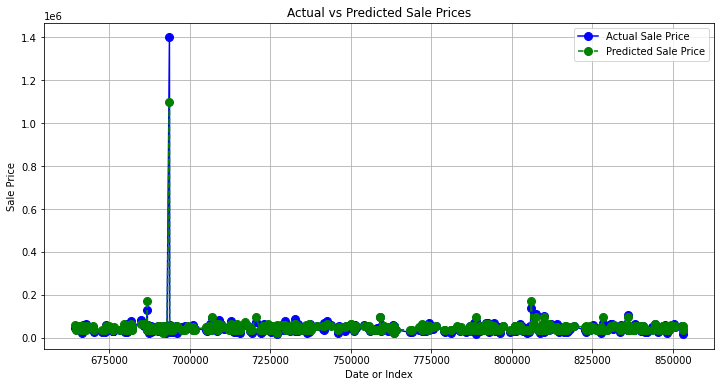

In [18]:

# Train a model (you need to choose a suitable model based on your data)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

plt.figure(figsize=(12, 6))

# Plot actual sale prices
plt.plot(test.index, y_test, label='Actual Sale Price', marker='o', linestyle='-', color='blue', markersize=8)

# Plot predicted sale prices
plt.plot(test.index, predictions, label='Predicted Sale Price', marker='o', linestyle='--', color='green', markersize=8)

# Add labels and title
plt.title('Actual vs Predicted Sale Prices')
plt.xlabel('Date or Index')
plt.ylabel('Sale Price')
plt.legend()

# Display a grid for better readability
plt.grid(True)

# Show the plot
plt.show()